# Looking at TF-Modisco results

In [2]:
library(tidyverse)
library(GGally)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [3]:
tomtom = read.delim("../tomtom_scripts/results/PWMs_modisco.tsv", sep = "\t")
tomtom_trans = read.delim("../tomtom_scripts/results/PWMs_modisco_trans.tsv", sep = "\t")

In [4]:
head(tomtom)

,Query_ID,Target_ID,Optimal_offset,p.value,E.value,q.value,Overlap,Query_consensus,Target_consensus,Orientation
,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>
1,1,MA0601.1,0,0.000126061,0.0940413,0.0532817,6,TTAATT,TTAATTAATAT,-
2,1,MA0721.1,0,0.000193158,0.1440960,0.0532817,6,TTAATT,TTAATTAG,-
3,1,MA0706.1,1,0.000225507,0.1682280,0.0532817,6,TTAATT,GTTAATTACT,-
4,1,MA0717.1,0,0.000270190,0.2015620,0.0532817,6,TTAATT,TTAATTGG,-
5,1,MA0630.1,0,0.000317541,0.2368860,0.0532817,6,TTAATT,TTAATTGG,+
6,1,MA0704.1,0,0.000317541,0.2368860,0.0532817,6,TTAATT,TTAATTAA,+


In [5]:
jaspar_meta = read.delim("../data/jaspar_meta.txt", sep = " ")
tfs = c("EGR1", "CEBPB", "E2F6", "ELF1")
ids = jaspar_meta$matrix_id[jaspar_meta$tf_name %in% tfs] %>% as.character
ids

[1] "MA0162.4" "MA0466.2" "MA0471.2" "MA0473.3"

In [6]:
tomtom = merge(tomtom, jaspar_meta, 
               by.x = "Target_ID", by.y = "matrix_id") 

In [7]:
lapply(ids, function(id){
    tomtom %>% filter(Target_ID == id) %>% 
    arrange(p.value) %>%
    head(3)
})

,Target_ID,Query_ID,Optimal_offset,p.value,E.value,q.value,Overlap,Query_consensus,Target_consensus,Orientation,tf_name
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
1,MA0162.4,98,4,2.04924e-05,0.0152873,0.00557452,9,GGGGGCGGG,GGGCGTGGGCGTGG,-,EGR1
2,MA0162.4,14,4,4.71174e-05,0.0351495,0.00460282,10,GGGGGAGGGG,GGGCGTGGGCGTGG,-,EGR1
3,MA0162.4,80,1,1.25991e-04,0.0939892,0.01469690,9,CCCACCCCC,CCACGCCCACGCCC,+,EGR1
,Target_ID,Query_ID,Optimal_offset,p.value,E.value,q.value,Overlap,Query_consensus,Target_consensus,Orientation,tf_name
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
1,MA0466.2,12,0,4.43568e-07,0.000330901,0.000152259,10,ATTGCATAAT,ATTGCGCAAT,-,CEBPB
2,MA0466.2,94,1,9.13087e-06,0.006811630,0.004521080,9,TTGAGCAAC,ATTGCGCAAT,+,CEBPB
3,MA0466.2,78,2,3.60124e-05,0.026865200,0.008891500,8,TGTGCAATC,ATTGCGCAAT,-,CEBPB
,Target_ID,Query_ID,Optimal_offset,p.value,E.value,q.value,Overlap,Query_consensus,Target_consensus,Orientation,tf_name


In [9]:
# comparing to max active subsequence 
tomtom_max = read.delim("../tomtom_scripts/results/PWMs_max_active_per_seq.tsv", sep = "\t")
tomtom_max = merge(tomtom_max, jaspar_meta, 
                   by.x = "Target_ID", by.y = "matrix_id") 
lapply(ids, function(id){
    tomtom_max %>% filter(Target_ID == id) %>% 
    arrange(p.value) %>%
    head(1)
})

,Target_ID,Query_ID,Optimal_offset,p.value,E.value,q.value,Overlap,Query_consensus,Target_consensus,Orientation,tf_name
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
1,MA0162.4,15,6,0.000678097,0.50586,0.275011,8,CCACAGCC,CCACGCCCACGCCC,+,EGR1
,Target_ID,Query_ID,Optimal_offset,p.value,E.value,q.value,Overlap,Query_consensus,Target_consensus,Orientation,tf_name
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
1,MA0466.2,211,2,1.00012e-05,0.00746091,0.00739484,8,TGCCTAAT,ATTGCGCAAT,-,CEBPB
,Target_ID,Query_ID,Optimal_offset,p.value,E.value,q.value,Overlap,Query_consensus,Target_consensus,Orientation,tf_name
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
1,MA0471.2,194,5,0.00198751,1.48268,0.11399,8,CCCCCCAC,CCTTCCCGCCCCC,-,E2F6
,Target_ID,Query_ID,Optimal_offset,p.value,E.value,q.value,Overlap,Query_consensus,Target_consensus,Orientation,tf_name
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>


In [42]:
lapply(ids, function(id){
    tomtom_trans %>% filter(Target_ID == id) %>% 
    arrange(p.value) %>%
    head()
})

,Query_ID,Target_ID,Optimal_offset,p.value,E.value,q.value,Overlap,Query_consensus,Target_consensus,Orientation
,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>
1,80,MA0162.4,1,2.84691e-05,0.0212380,0.00592388,9,CCCACCCAC,CCACGCCCACGCCC,+
2,98,MA0162.4,4,1.02809e-04,0.0766953,0.02159500,9,GAGGGCGGG,GGGCGTGGGCGTGG,-
3,70,MA0162.4,2,2.50411e-04,0.1868070,0.03269570,8,CCACCCAC,CCACGCCCACGCCC,+
4,14,MA0162.4,4,2.51956e-04,0.1879590,0.02466380,10,GGGGGAGGGG,GGGCGTGGGCGTGG,-
5,83,MA0162.4,0,8.26006e-04,0.6162010,0.39054200,9,GTGTGTGTG,GGGCGTGGGCGTGG,-
6,49,MA0162.4,6,8.46711e-04,0.6316460,0.17486000,7,GGGAGGG,GGGCGTGGGCGTGG,-
,Query_ID,Target_ID,Optimal_offset,p.value,E.value,q.value,Overlap,Query_consensus,Target_consensus,Orientation
,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>
1,12,MA0466.2,0,1.23578e-06,0.00092189,0.000419632,10,ATTGCATAAT,ATTGCGCAAT,-


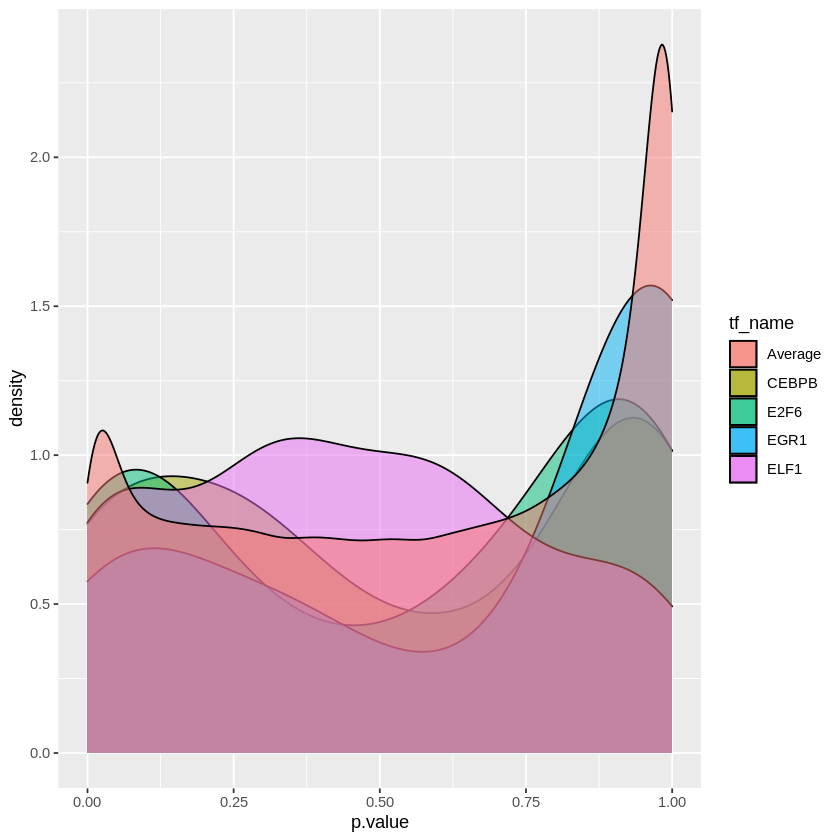

In [68]:
# for each filter rank the TFs 
ggplot() + 
    geom_density(aes(p.value, fill = tf_name), 
                 data = tomtom %>% filter(Target_ID %in% ids), 
                 alpha = 0.5) + 
    geom_density(aes(p.value, fill = "Average"), 
                 data = tomtom, 
                 alpha = 0.5)

In [120]:
# clustering based on tomtom scores 
p_values = sapply(unique(tomtom$Query_ID), function(i){
    values = (tomtom %>% 
     filter(Query_ID == i) %>% 
     arrange(Target_ID))$p.value
    names(values) = (tomtom %>% 
     filter(Query_ID == i) %>% 
     arrange(Target_ID))$tf_name
    values
})

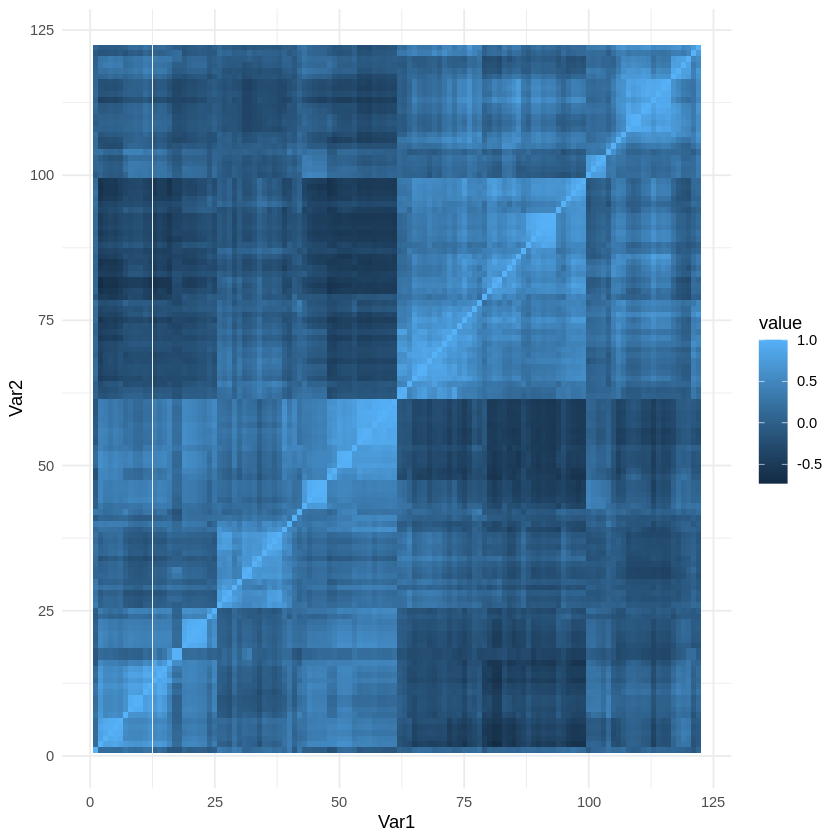

In [118]:
cor_mat <- cor(p_values)
clusts = hclust(1-as.dist(cor_mat))
ggplot(melt(cor_mat[clusts$order, clusts$order])) + 
    geom_tile(aes(x = Var1, y = Var2, fill = value)) + 
    theme_minimal()

In [159]:
# label the filters based on which of the 4 TFs are ranked the highest
subsetted <- p_values[tfs, ]
col_mins <- sapply(1:ncol(subsetted), function(i){
    which.min(subsetted[, i])
})
min_p_vals <- sapply(1:ncol(subsetted), function(i){
    min(subsetted[, i])
})

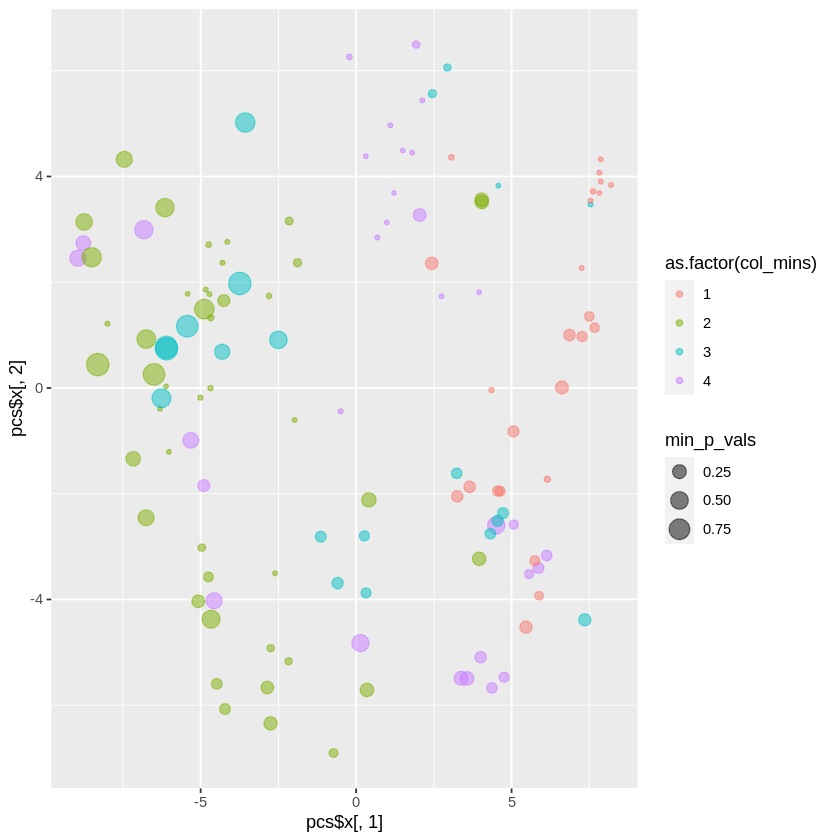

In [165]:
pcs = prcomp(t(p_values))
ggplot() + 
    geom_point(aes(x = pcs$x[, 1], y = pcs$x[, 2], 
                   color = as.factor(col_mins), 
                   size =  min_p_vals
                  ), alpha = 0.5)